In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data
df=pd.read_csv('Subject_1-Summer products.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [3]:
df.drop(columns=['title','badges_count',
                 'urgency_text','merchant_name','merchant_info_subtitle','merchant_id',
                 'merchant_profile_picture','product_url','product_picture'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1573 non-null   object 
 1   price                         1573 non-null   float64
 2   retail_price                  1573 non-null   int64  
 3   currency_buyer                1573 non-null   object 
 4   units_sold                    1573 non-null   int64  
 5   uses_ad_boosts                1573 non-null   int64  
 6   rating                        1573 non-null   float64
 7   rating_count                  1573 non-null   int64  
 8   rating_five_count             1528 non-null   float64
 9   rating_four_count             1528 non-null   float64
 10  rating_three_count            1528 non-null   float64
 11  rating_two_count              1528 non-null   float64
 12  rating_one_count              1528 non-null   float64
 13  bad

In [4]:
#1.Clean tags: lowercasing, stripping spaces
df['tags'] = df['tags'].str.lower().str.strip()

#2. Define keywords for each category
category_keywords = {
    'shirt': ['shirt', 'blouse'],
    't-shirt': ['t-shirt', 'tee'],
    'shoe': ['shoe', 'sneaker', 'footwear'],
    'jacket': ['jacket', 'coat', 'windbreaker'],
    'shorts': ['shorts'],
    'dress': ['dress', 'gown'],
    'pants': ['pants', 'trousers'],
    'skirt': ['skirt'],
    'swimwear': ['swim', 'bikini', 'trunks'],
}

#3. Function to assign category based on tags
def categorize_product(tags):
    tags = str(tags).lower()
    for category, keywords in category_keywords.items():
        if any(keyword in tags for keyword in keywords):
            return category
    return 'other'

#4. Apply function to new column
df['category'] = df['tags'].apply(categorize_product)

# View result
print(df[['tags', 'category']].head())

# Save the cleaned dataset
df.to_csv('categorized_products.csv', index=False)
df['category'].value_counts()


                                                tags category
0  summer,fashion,womenunderwearsuit,printedpajam...    shirt
1  mini,womens dresses,summer,patchwork,fashion d...    dress
2  summer,cardigan,women beachwear,chiffon,sexy w...   jacket
3  summer,shorts,cotton,cotton t shirt,sleeve,pri...    shirt
4  summer,plus size,lace,casual pants,bottom,pant...   shorts


category
shirt       535
dress       381
shorts      335
other       151
swimwear     84
pants        64
shoe         16
jacket        4
skirt         2
t-shirt       1
Name: count, dtype: int64

In [5]:
#1. Standardize Color Formatting
# Remove extra spaces, special characters, and inconsistent naming:
df['product_color'] = df['product_color'].str.lower().str.strip()
#2. Handle Missing Color Values - Fill blank colors with 'Unknown':
df['product_color'].fillna('Unknown', inplace=True)
#3. Remove Unnecessary Color Combinations.If colors like 'black & yellow' or 'pink & grey' are unhelpful, split them:
df['product_color'] = df['product_color'].str.split('&').str[0]
#4. Get a Summary of Cleaned Colors. Count occurrences of each color:
color_counts = df['product_color'].value_counts()
print(color_counts)
# 5.Normalize Color Names. Convert to lowercase and remove extra spaces:
df['product_color'] = df['product_color'].str.lower().str.strip()
#6. Consolidate Similar Colors Map multiple variations to a common name:
color_mapping = {
    'winered': 'wine red', 'navyblue': 'navy blue', 'fluorescentgreen': 'fluorescent green',
    'lightgreen': 'light green', 'lightblue': 'light blue', 'lightpink': 'light pink',
    'rosered': 'rose red', 'army green': 'armygreen', 'darkgreen': 'dark green',
    'blackwhite': 'black & white', 'gray': 'grey'
}
df['product_color'] = df['product_color'].replace(color_mapping)
# 7. Handle Blank or Unknown Entries.Fill missing colors with 'Unknown':
df['product_color'].fillna('unknown', inplace=True)
#8. Remove Extremely Rare or Irrelevant Colors.Filter out uncommon color names (if necessary):
common_colors = ['black', 'white', 'red', 'blue', 'green', 'grey', 'pink', 'purple', 'orange', 'beige', 'brown', 'yellow', 'multicolor']
df['product_color'] = df['product_color'].apply(lambda x: x if x in common_colors else 'other color')
#9. Get Cleaned Color Counts.Check the distribution after cleaning:
color_counts = df['product_color'].value_counts()
print(color_counts)


product_color
black         305
white         257
yellow        105
pink          101
blue          100
             ... 
violet          1
blackwhite      1
darkgreen       1
rosegold        1
gold            1
Name: count, Length: 87, dtype: int64
product_color
black          317
other color    280
white          270
pink           109
yellow         105
blue           101
red             95
green           90
grey            83
purple          53
orange          28
multicolor      20
beige           14
brown            8
Name: count, dtype: int64


C:\Users\Acer\AppData\Local\Temp\ipykernel_245636\2921563920.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product_color'].fillna('Unknown', inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_245636\2921563920.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [6]:
#1.Standardize size formatting (Remove extra spaces, dots, and inconsistent naming)
df['product_variation_size_id'] = df['product_variation_size_id'].str.replace(r'[^a-zA-Z0-9]', '', regex=True).str.upper()
#2.Handle missing values (Fill empty sizes with 'Unknown')
df['product_variation_size_id'].fillna('UNKNOWN', inplace=True)
#3.Group similar size categories (E.g., XS, X-S, SIZE XS)
size_mapping = {
    'XXXS': 'XXXS', 'XXS': 'XXS', 'XS': 'XS', 'S': 'S', 'M': 'M', 'L': 'L',
    'XL': 'XL', 'XXL': 'XXL', 'XXXL': 'XXXL', 'XXXXL': 'XXXXL', 'XXXXXL': 'XXXXXL'
}
df['product_variation_size_id'] = df['product_variation_size_id'].replace(size_mapping)
#4.Remove invalid or irrelevant sizes (e.g., Base Coat, Floating Chair for Kid)
valid_sizes = ['XXXS', 'XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL', 'XXXL', 'XXXXL', 'XXXXXL']
df['product_variation_size_id'] = df['product_variation_size_id'].apply(lambda x: x if x in valid_sizes else 'other size')
#5.Summarize the cleaned data (Get the count for each size)
size_counts = df['product_variation_size_id'].value_counts()
print(size_counts)


product_variation_size_id
S             665
XS            361
M             204
other size    149
XXS           100
L              50
XL             18
XXL            15
XXXS            6
XXXXXL          2
XXXXL           2
XXXL            1
Name: count, dtype: int64


C:\Users\Acer\AppData\Local\Temp\ipykernel_245636\2888265072.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product_variation_size_id'].fillna('UNKNOWN', inplace=True)


In [7]:
df.to_csv('Final_project.csv', index=False, encoding='utf-8-sig')

In [8]:
df = pd.read_csv('Final_project.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1573 non-null   object 
 1   price                         1573 non-null   float64
 2   retail_price                  1573 non-null   int64  
 3   currency_buyer                1573 non-null   object 
 4   units_sold                    1573 non-null   int64  
 5   uses_ad_boosts                1573 non-null   int64  
 6   rating                        1573 non-null   float64
 7   rating_count                  1573 non-null   int64  
 8   rating_five_count             1528 non-null   float64
 9   rating_four_count             1528 non-null   float64
 10  rating_three_count            1528 non-null   float64
 11  rating_two_count              1528 non-null   float64
 12  rating_one_count              1528 non-null   float64
 13  bad

In [9]:

where = [(df['rating_count']>=1500),
         (df['rating_count']<1500)&(df['rating_count']>=1000),
         (df['rating_count']<1000)&(df['rating_count']>=500),
         (df['rating_count']<500)&(df['rating_count']>=100),
         (df['rating_count']<100)&(df['rating_count']>=10),
         (df['rating_count']<10)]
choices = ['1500-','1500-1000','1000-500','500-100','100-10','-10']
df['status_rate'] = np.select(where, choices, default='N/A')
df['status_rate'].value_counts()
df.to_csv('Final_project.csv',index=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1573 non-null   object 
 1   price                         1573 non-null   float64
 2   retail_price                  1573 non-null   int64  
 3   currency_buyer                1573 non-null   object 
 4   units_sold                    1573 non-null   int64  
 5   uses_ad_boosts                1573 non-null   int64  
 6   rating                        1573 non-null   float64
 7   rating_count                  1573 non-null   int64  
 8   rating_five_count             1528 non-null   float64
 9   rating_four_count             1528 non-null   float64
 10  rating_three_count            1528 non-null   float64
 11  rating_two_count              1528 non-null   float64
 12  rating_one_count              1528 non-null   float64
 13  bad

In [10]:

where = [(df['origin_country']=='CN'),
         (df['origin_country']=='GB'),
         (df['origin_country']=='SG'),
         (df['origin_country']=='US'),
         (df['origin_country']=='VE'),(df['origin_country']=='AT')
         ]
choices = ['China','Great Britain','Singapore','United States','Venezuela','Austria']
df['origin_country_name'] = np.select(where, choices, default='N/A')
df['origin_country_name'].value_counts()
df.to_csv('Final_project.csv',index=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1573 non-null   object 
 1   price                         1573 non-null   float64
 2   retail_price                  1573 non-null   int64  
 3   currency_buyer                1573 non-null   object 
 4   units_sold                    1573 non-null   int64  
 5   uses_ad_boosts                1573 non-null   int64  
 6   rating                        1573 non-null   float64
 7   rating_count                  1573 non-null   int64  
 8   rating_five_count             1528 non-null   float64
 9   rating_four_count             1528 non-null   float64
 10  rating_three_count            1528 non-null   float64
 11  rating_two_count              1528 non-null   float64
 12  rating_one_count              1528 non-null   float64
 13  bad

In [11]:
bins = list(range(0, int(df['price'].max()) + 5, 5))
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df['price_group'] = pd.cut(df['price'], bins=bins, right=False, labels=labels)
df['price_group']
df.to_csv('Final_project.csv',index=False)

In [12]:
# Define price bins and labels
bins = [0, 5, 10, 15, 20, float('inf')]  # 'inf' represents prices over 20 dollars
labels = ["0-5", "6-10", "11-15", "16-20", "20+"]

# Apply pd.cut() to categorize prices
df['price_group'] = pd.cut(df['price'], bins=bins, right=True, labels=labels)
df['price_group']
df.to_csv('Final_project.csv',index=False)

In [13]:
df['price_group'].value_counts()

price_group
6-10     762
11-15    416
0-5      323
16-20     63
20+        9
Name: count, dtype: int64

In [14]:
df["revenue"] = df["price"] * df["units_sold"]
df.to_csv('Final_project.csv',index=False)

In [15]:
df['tags'] = df['tags'].astype(str)

# Create new indicator columns based on the 'tags' column:
df['Summer'] = df['tags'].apply(lambda tag: 1 if 'summer' in tag.lower() else 0)
df['Spring'] = df['tags'].apply(lambda tag: 1 if 'spring' in tag.lower() else 0)
df['Autumn'] = df['tags'].apply(lambda tag: 1 if ('autumn' in tag.lower() or 'fall' in tag.lower()) else 0)
df['Winter'] = df['tags'].apply(lambda tag: 1 if 'winter' in tag.lower() else 0)

# Preview to ensure the new columns are added as expected.
df[['tags', 'Summer', 'Spring', 'Autumn', 'Winter']].head()
df.to_csv("Final_project_with_season_columns.csv", index=False)

In [16]:
# Define keyword sets for each category
keywords_men = {'men', 'mens','male','males', 'man','mans', 'menswear', 'boy','guy', 'guys', 'masculine', 'gents', 'gentlemen', "men's"}
keywords_women = {'women','womens', 'female', 'woman','womans', 'womenswear', 'girl', 'ladies','femanine', 'lady',"women's",'bikini','two pieces'}
keywords_unisex = {'unisex', 'both', 'all', 'everyone', 'anyone'}

# Function to categorize based on tags
def categorize_product(tags):
    if pd.isna(tags):
        return 'Unisex'
    
    tags_lower = tags.lower()
    tag_tokens = set(tags_lower.replace(",", " ").split())
#
    is_men = any(word in tag_tokens for word in keywords_men)
    is_women = any(word in tag_tokens for word in keywords_women)
    is_unisex = any(word in tag_tokens for word in keywords_unisex)

    if is_unisex or (is_men and is_women):
        return 'Unisex'
    elif is_men:
        return 'Men'
    elif is_women:
        return 'Women'
    else:
        return 'Unisex'

# Apply the function to create a new column
df['gender_category'] = df['tags'].apply(categorize_product)

# Show distribution of categories
df['gender_category'].value_counts()

gender_category
Women     1416
Unisex      86
Men         71
Name: count, dtype: int64

In [17]:
# Mapping values ad status
df['ad_status'] = df['uses_ad_boosts'].map({0: "No Ad", 1: "Ad Boosts"})

# Mapping value merchant has profile picture
df['profile_picture'] = df['merchant_has_profile_picture'].map({0: "No Profile Picture", 1: "Has Profile Picture"})

In [18]:
# Calculate revenue based on price and units sold
df["revenue"] = df["price"] * df["units_sold"]
# Calculate difference between price and retail_price
df["price_difference"] = df["price"] - df["retail_price"]

In [19]:
df[['rating', 'rating_five_count','rating_four_count','rating_three_count' ,'rating_two_count', 'rating_one_count', 'rating_count']]
df['high_rate_percentage'] = ((df['rating_five_count']+df['rating_four_count'])/df['rating_count'] * 100).round(2)
bins = [0,20,40,60,80,100]
labels = ['E','D','C','B','A']
df['high_rate_percentage_group'] = pd.cut(df['high_rate_percentage'],bins=bins,labels=labels,right=True)
df['high_rate_percentage_group'] = df['high_rate_percentage_group'].cat.add_categories(['No rating']).fillna('No rating')
df.to_csv("Final_project.csv", index=False)
df.groupby('high_rate_percentage_group').agg({'price':'mean','units_sold':'mean',
                                              'revenue':'mean'}).round(2).sort_values('high_rate_percentage_group',ascending=False)
df.to_csv('Final_project.csv',index=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_245636\3519910343.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('high_rate_percentage_group').agg({'price':'mean','units_sold':'mean',


In [20]:
# Prioritize rows with has_urgency_banner == 1
df_sorted = df.sort_values(by='has_urgency_banner', ascending=False)

# Drop duplicates, keeping the first occurrence which has has_urgency_banner if available
df_deduplicated = df_sorted.drop_duplicates(subset='product_id', keep='first')

# Check the result
df_deduplicated[['product_id', 'has_urgency_banner']].head(10)

,product_id,has_urgency_banner
1569,5eccd22b4497b86fd48f16b4,1.0
0,5e9ae51d43d6a96e303acdb0,1.0
1,58940d436a0d3d5da4e95a38,1.0
2,5ea10e2c617580260d55310a,1.0
4,5ebf5819ebac372b070b0e70,1.0
8,5e6f1fb7fe4a5bb4b8bf36e5,1.0
10,5cac5af68de7960d89e54fe0,1.0
11,5ec49d527d7044ccfa3f1c04,1.0
17,5b07a7c6e997b33c6f9947da,1.0
1510,5df202bb707508021388614a,1.0


In [21]:
# Check for duplicate product_id values
duplicate_counts = df_deduplicated['product_id'].duplicated().sum()
duplicate_counts

np.int64(0)

In [22]:
# Save the modified DataFrame to a new CSV file
df = df_deduplicated.reset_index(drop=True)
df.to_csv('Final_project.csv',index=False)

In [23]:
# Round merchant_rating to nearest 0.5 and clip between 0 and 5
df['merchant_rating_range'] = (df['merchant_rating'] * 2).round() / 2
df['merchant_rating_range'] = df['merchant_rating_range'].clip(lower=0, upper=5)

# Extract unique merchant info
merchant_df = df[['merchant_title', 'merchant_rating_count', 'merchant_rating', 'merchant_rating_range','merchant_has_profile_picture','profile_picture']].drop_duplicates()

# Save to a new CSV file
merchant_df.to_csv("unique_merchants.csv", index=False)

# View the first few rows
merchant_df.head()

,merchant_title,merchant_rating_count,merchant_rating,merchant_rating_range,merchant_has_profile_picture,profile_picture
0,sell best quality goods,4435,3.696054,3.5,0,No Profile Picture
1,zgrdejia,568,4.128521,4.0,0,No Profile Picture
2,SaraHouse,17752,3.899673,4.0,0,No Profile Picture
3,hxt520,295,3.989831,4.0,0,No Profile Picture
4,youngpeopleshop,14482,4.001588,4.0,0,No Profile Picture


In [24]:

order = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'No rating':6}
order2 = {'0-5': 1, '6-10': 2, '11-15': 3, '16-20': 4, '20+': 5}

df['Sortrating'] = df['high_rate_percentage_group'].map(order)
df['SortPrice'] = df['price_group'].map(order2) 

df.to_csv('Final_project.csv',index=False)

In [25]:
df.groupby('high_rate_percentage_group').agg({'units_sold':'mean','price':'mean','revenue':'mean'}).sort_values('high_rate_percentage_group',ascending=False).round(2)

C:\Users\Acer\AppData\Local\Temp\ipykernel_245636\2306047799.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('high_rate_percentage_group').agg({'units_sold':'mean','price':'mean','revenue':'mean'}).sort_values('high_rate_percentage_group',ascending=False).round(2)


,units_sold,price,revenue
high_rate_percentage_group,,,
No rating,30.74,8.13,251.53
A,3287.09,8.47,29161.05
B,5998.36,8.67,48327.32
C,3966.17,8.07,31258.45
D,886.83,7.83,9708.98
E,10.00,18.00,180.00


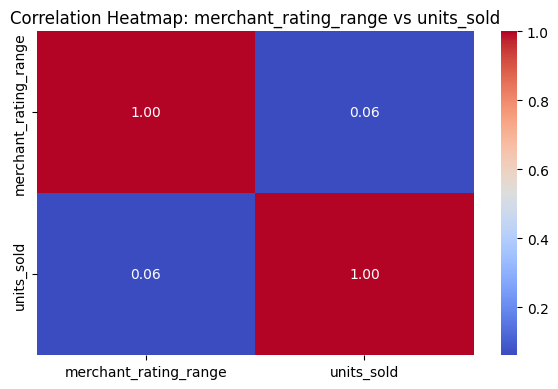

In [26]:
# Calculate correlation matrix for the two columns
correlation = df[['merchant_rating_range', 'units_sold']].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: merchant_rating_range vs units_sold")
plt.tight_layout()

# Show plot
plt.show()

Correlation between 'price_difference' and 'units_sold':
                  price_difference  units_sold
price_difference          1.000000   -0.015017
units_sold               -0.015017    1.000000


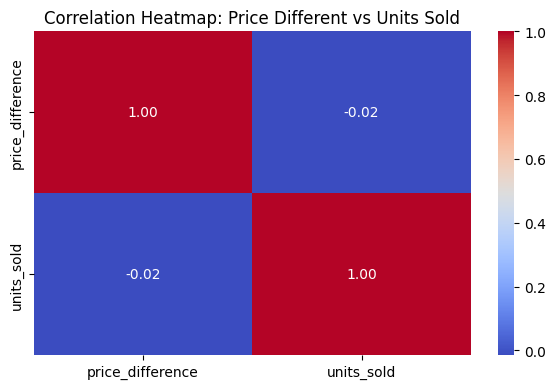

In [27]:
# Calculate correlation
correlation = df[['price_difference', 'units_sold']].corr()

# Print correlation value
print("Correlation between 'price_difference' and 'units_sold':")
print(correlation)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Price Different vs Units Sold")
plt.tight_layout()
plt.show()

Correlation between average product rating and merchant rating: 0.2708


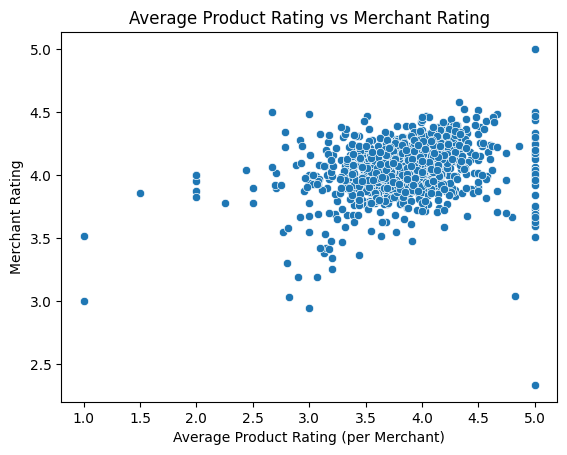

In [38]:
# Drop missing values
df = df.dropna(subset=["merchant_title", "product_id", "rating", "merchant_rating"])

# Convert ratings to numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["merchant_rating"] = pd.to_numeric(df["merchant_rating"], errors="coerce")

# Calculate the average product rating per merchant by grouping by merchant_title
avg_product_rating = df.groupby("merchant_title")["rating"].mean().reset_index()

# Ensure merchant rating is unique per store
merchant_rating = df.groupby("merchant_title")["merchant_rating"].mean().reset_index()

# Merge the datasets
merged_df = avg_product_rating.merge(merchant_rating, on="merchant_title")

# Compute correlation
correlation = merged_df["rating"].corr(merged_df["merchant_rating"])
print(f"Correlation between average product rating and merchant rating: {correlation:.4f}")

# Visualize the relationship
sns.scatterplot(data=merged_df, x="rating", y="merchant_rating")
plt.title("Average Product Rating vs Merchant Rating")
plt.xlabel("Average Product Rating (per Merchant)")
plt.ylabel("Merchant Rating")
plt.show()

# Geographic & Consumer behavior

Compare product by origin

In [29]:
df.groupby('origin_country').agg({'rating':'mean','revenue':'mean'
                                         ,'units_sold':'sum'})
# CN: China, GB: Greatest British, SG: Singapore, US: USA, VE: 


,rating,revenue,units_sold
origin_country,,,
AT,5.000000,700.000000,100
CN,3.842921,39482.428864,6291349
GB,4.030000,9000.000000,1000
SG,4.010000,28496.500000,20100
US,3.795556,15880.444444,43210
VE,3.146667,980.500000,250


Shipping speed and option by origin country

In [30]:
where = df['shipping_is_express'] == 1
df[where][['shipping_option_name','shipping_is_express','shipping_option_price','countries_shipped_to','origin_country_name','rating']]

,shipping_option_name,shipping_is_express,shipping_option_price,countries_shipped_to,origin_country_name,rating
312,Ekspresowa wysyłka,1,7,39,China,4.29
844,Livraison Express,1,7,41,China,2.79
883,Livraison Express,1,12,41,China,4.67
940,Livraison Express,1,6,43,China,4.52


Product review

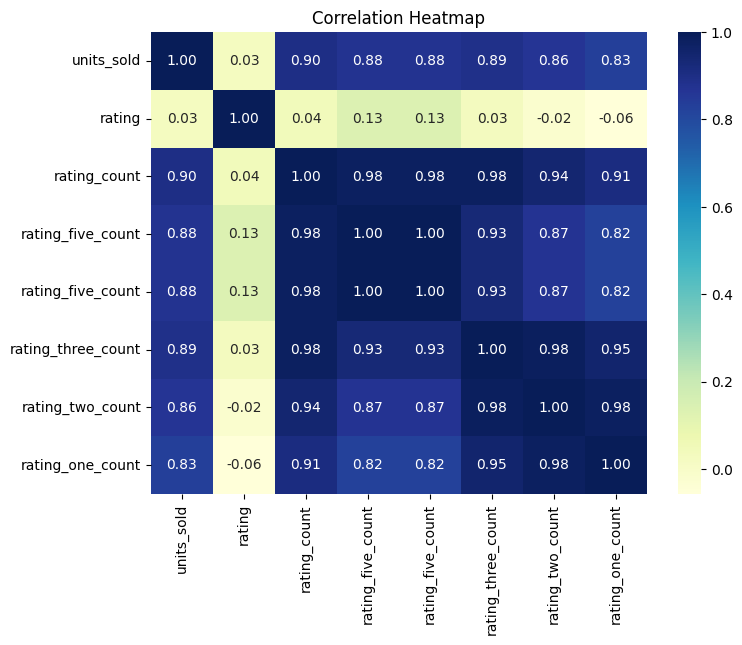

In [31]:

corr=df[['units_sold','rating', 'rating_count', 'rating_five_count','rating_five_count',
         'rating_three_count','rating_two_count' ,'rating_one_count']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Inventory and consume pattern

In [32]:
def remove_outliers_and_calc_mean(group):
    Q1 = group['units_sold'].quantile(0.25)
    Q3 = group['units_sold'].quantile(0.75)
    IQR = Q3 - Q1
    filtered = group[(group['units_sold'] >= Q1 - 1.5 * IQR) & (group['units_sold'] <= Q3 + 1.5 * IQR)]
    return filtered['units_sold'].mean()

result = df.groupby('product_variation_inventory').apply(remove_outliers_and_calc_mean).sort_values(ascending=False)
result = result.reset_index()
result.corr()


C:\Users\Acer\AppData\Local\Temp\ipykernel_245636\2870090436.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('product_variation_inventory').apply(remove_outliers_and_calc_mean).sort_values(ascending=False)


,product_variation_inventory,0
product_variation_inventory,1.000000,0.130656
0,0.130656,1.000000


In [33]:
where = df['badge_local_product']==0
df['badge_local_product'].value_counts()
df[where][['badge_local_product','units_sold']]

,badge_local_product,units_sold
0,0,100
1,0,100
2,0,20000
3,0,100
4,0,100
...,...,...
1336,0,100
1337,0,20000
1338,0,10000
1339,0,100


# opperate

purchasing percentage by shipping price

In [34]:
df.groupby('shipping_option_price')['units_sold'].sum().reset_index().corr()

,shipping_option_price,units_sold
shipping_option_price,1.000000,-0.675199
units_sold,-0.675199,1.000000


할인 전략의 효율성

상품 품질과 리뷰 관리

merchant review

In [35]:
df.groupby('merchant_has_profile_picture').agg({'merchant_rating':'mean', 'merchant_rating_count':'mean','units_sold':'mean'}).round(2)

,merchant_rating,merchant_rating_count,units_sold
merchant_has_profile_picture,,,
0,4.03,24237.47,4212.72
1,4.08,48257.60,8228.75
